In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

In [28]:
resultados_modelos = pd.read_csv('data/resultados_dos_modelos_aluguel.csv')
resultados_rn = pd.read_csv('data/resultados_da_rn_aluguel.csv').drop(columns=['index']).replace('R2', 'R²')

In [29]:
resultados_modelos.loc[resultados_modelos["Métrica"].isin(["MAE", "RMSE", "MAPE"]), "Valor"] = resultados_modelos[resultados_modelos["Métrica"].isin(["MAE", "RMSE", "MAPE"])]["Valor"] * -1

In [30]:
resultados_rn.loc[resultados_rn["Métrica"] == "MAPE", "Valor"] = resultados_rn[resultados_rn["Métrica"] == "MAPE"]["Valor"] / 100

In [31]:
print(resultados_rn["Métrica"].unique())
print(resultados_modelos["Métrica"].unique())

['MAE' 'RMSE' 'R²' 'MAPE']
['MAE' 'RMSE' 'R²' 'MAPE']


In [36]:
resultados_totais = pd.concat([resultados_modelos, resultados_rn])
resultados_totais

,Métrica,Valor,Algoritmo
0,MAE,1777.813181,Ridge
1,MAE,1777.198873,Ridge
2,MAE,1771.162057,Ridge
3,MAE,1728.559083,Ridge
4,MAE,1707.082274,Ridge
...,...,...,...
967,MAPE,0.573361,RedeNeural
968,MAPE,0.573428,RedeNeural
969,MAPE,0.657522,RedeNeural
970,MAPE,0.690661,RedeNeural


C:\Users\FVF0\AppData\Local\Temp\ipykernel_3372\3792620720.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\FVF0\AppData\Local\Temp\ipykernel_3372\3792620720.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\FVF0\AppData\Local\Temp\ipykernel_3372\3792620720.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\FVF0\AppData\Local\Temp\ipykernel_3372\3792620720.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

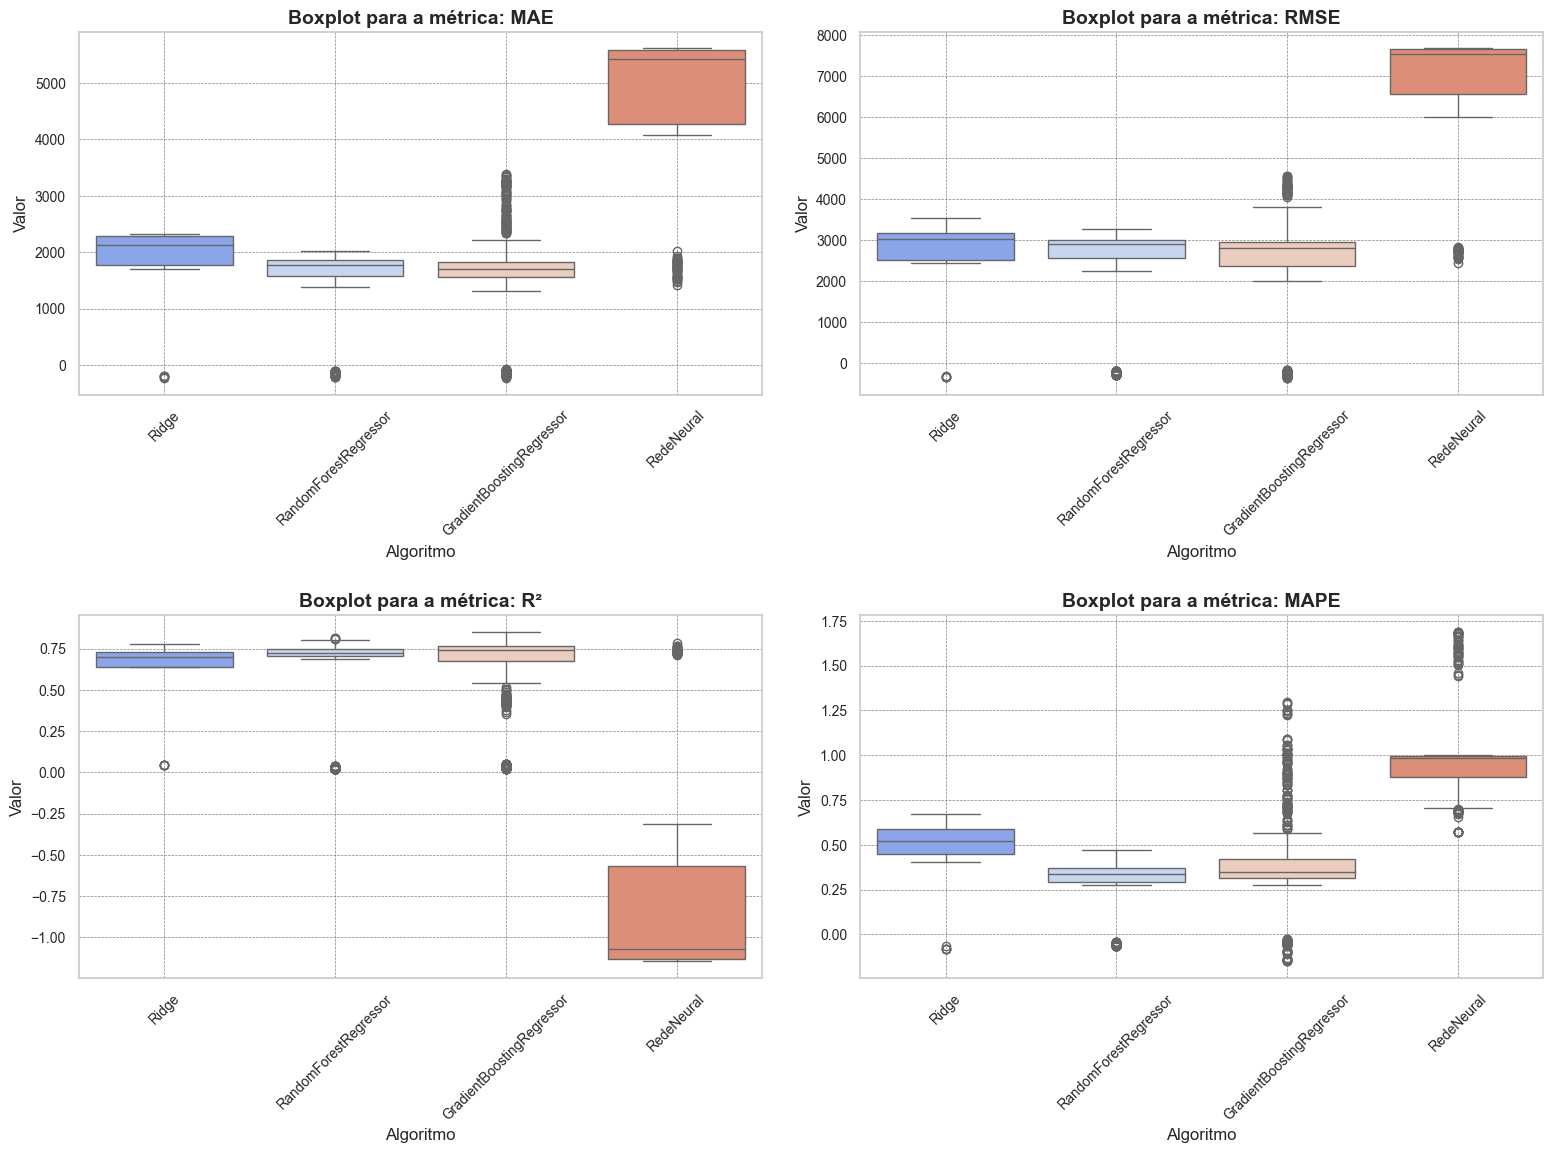

In [33]:
# Ajustar o estilo dos plots
sns.set_theme(style="whitegrid", palette="pastel")

# Obter as métricas únicas
metricas = resultados_totais['Métrica'].unique()

# Determinar o número de linhas e colunas
ncols = 2
nrows = math.ceil(len(metricas) / ncols)  # Calcula o número de linhas necessário

# Criar uma grade de subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 6 * nrows))
axes = axes.flatten()  # Achatar o array de eixos para facilitar o loop

# Criar um boxplot para cada métrica
for i, metrica in enumerate(metricas):
    sns.boxplot(
        data=resultados_totais[resultados_totais['Métrica'] == metrica],
        x='Algoritmo',
        y='Valor',
        ax=axes[i],
        palette="coolwarm"  # Paleta de cores
    )
    axes[i].set_title(f"Boxplot para a métrica: {metrica}", fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].grid(color='gray', linestyle='--', linewidth=0.5)

# Remover eixos extras, caso existam
for j in range(len(metricas), len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para evitar sobreposição
plt.tight_layout(pad=2.0)

# Exibir o gráfico
plt.show()